In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [65]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')

In [66]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [67]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [68]:
df = train.copy()
df['Date'] = pd.to_datetime(df['Date'])

In [69]:
df = df.set_index('Date')
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
Date,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,1,Yes,9,7011.84
2018-01-01,T1000002,253,S4,L2,R1,1,Yes,60,51789.12
2018-01-01,T1000003,252,S3,L2,R1,1,Yes,42,36868.20
2018-01-01,T1000004,251,S2,L3,R1,1,Yes,23,19715.16
2018-01-01,T1000005,250,S2,L3,R4,1,Yes,62,45614.52


In [75]:
df.plot(figsize=(15, 6)x=df.index.month,y='Sales')
plt.show()

SyntaxError: invalid syntax (<ipython-input-75-46bcbfe1b788>, line 1)

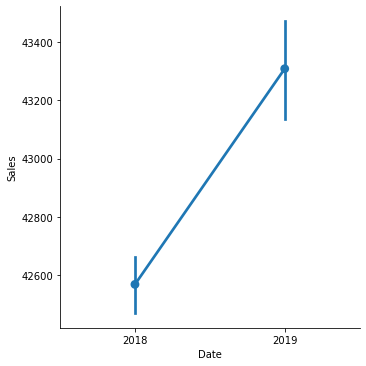

In [71]:
sns.factorplot(data=df,x=df.index.year,y="Sales")

In [ ]:
df = train[['Date','Sales']]
df.head()

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()

,Sales
Date,
2018-01-01,7011.84
2018-01-01,51789.12
2018-01-01,36868.20
2018-01-01,19715.16
2018-01-01,45614.52


<AxesSubplot:xlabel='Date'>

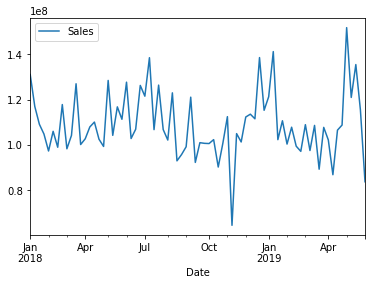

In [57]:
df.resample('W').sum().plot()

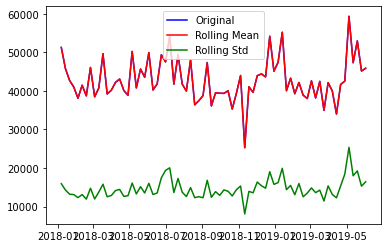

In [59]:
timeseries = df['Sales']
roll_mean = timeseries.rolling(window=7).mean()
roll_std = timeseries.rolling(window=7).std()
    
orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.show(block=False)

In [61]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
result = adfuller(timeseries, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
       print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -12.894926
p-value: 0.000000
Critical Values:
1% -3.430384736130366
5% -2.8615553529047295
10% -2.5667781718001312
